# Advanced demo: quotient metrics and nontrivial global topology

This notebook demonstrates advanced usage of `circle_bundles` involving quotient metrics
and datasets with nontrivial global topology (e.g. lens spaces and related constructions).

**Review note**
This notebook is provided as an advanced demonstration and is not required for software review.
It assumes familiarity with the methods described in the accompanying paper.
For a minimal tutorial, see `01_hopf_and_so3.ipynb`.


# Imports

In [1]:
# ============================================================
# Core scientific stack
# ============================================================
import numpy as np

import circle_bundles as cb

# ============================================================
# Local circular coordinates (optional)
# ============================================================
from dreimac import CircularCoords


# ============================================================
# Metric constructions (quotient and bundle metrics)
# ============================================================
from circle_bundles.metrics import (
    RP1AngleMetric as rp1_metric,
    Torus_DiagQuotientMetric_R4 as diag_metric,
    Torus_KleinQuotientMetric_R4 as kb_metric,
    S3QuotientMetric as s3_quotient_metric,
    RP2_TrivialMetric as rp2_trivial_metric,
    RP2_TwistMetric as rp2_nontrivial_orientable_metric,
    RP2_FlipMetric as rp2_nonorientable_metric,
)



In this notebook, we show how our pipeline can be applied to samplings from arbitrary metric spaces.  We generate random samplings of the trivial bundle and the Hopf bundle over $\mathbb{S}^{2}$ and use different quotient metrics to obtain different global topologies. 

# Lens Spaces $L(p,1) = \mathbb{S}^{3}/\mathbb{Z}_{p}$ As Circle Bundles Over $\mathbb{S}^{2}$

Given a vector $v\in \mathbb{S}^{2}$ and an integer $p\in \mathbb{Z}$, one has a continuous, free right $\mathbb{S}^{1}$-action on $\mathbb{S}^{3}$ defined by $q\cdot e^{i\theta} = qe^{i\frac{v}{2}}$. The hopf projection map $\pi:\mathbb{S}^{3}\to \mathbb{S}^{2}$ defined by $\pi(q) = qvq^{-1}$ is equivariant with respect to this action, so we obtain a new principal $\mathbb{S}^{1}$-bundle whose total space is the lens space $\mathbb{S}^{3}/\mathbb{Z}_{p}$ (and whose projection map is defined by $\widetilde{\pi}([q]) = [\pi(q)]$.  The Euler number of this bundle is $\pm p$.

In [2]:
# --- Generate a sample of s3 ---

n_samples = 10000
s3_data = cb.sample_sphere(n = n_samples, dim = 3)

print(f'{n_samples} samples from S3 generated.')

10000 samples from S3 generated.


In [3]:
# --- Compute base projections to s2 ---

v = np.array([1.0, 0.0, 0.0]) 
base_points = cb.hopf_projection(s3_data, v = v)
print(f'Base projections computed.')

Base projections computed.


### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 234$
- $\#(\text{2-simplices}) = 156$
- *No recorded simplices in dimensions* $\ge 3$

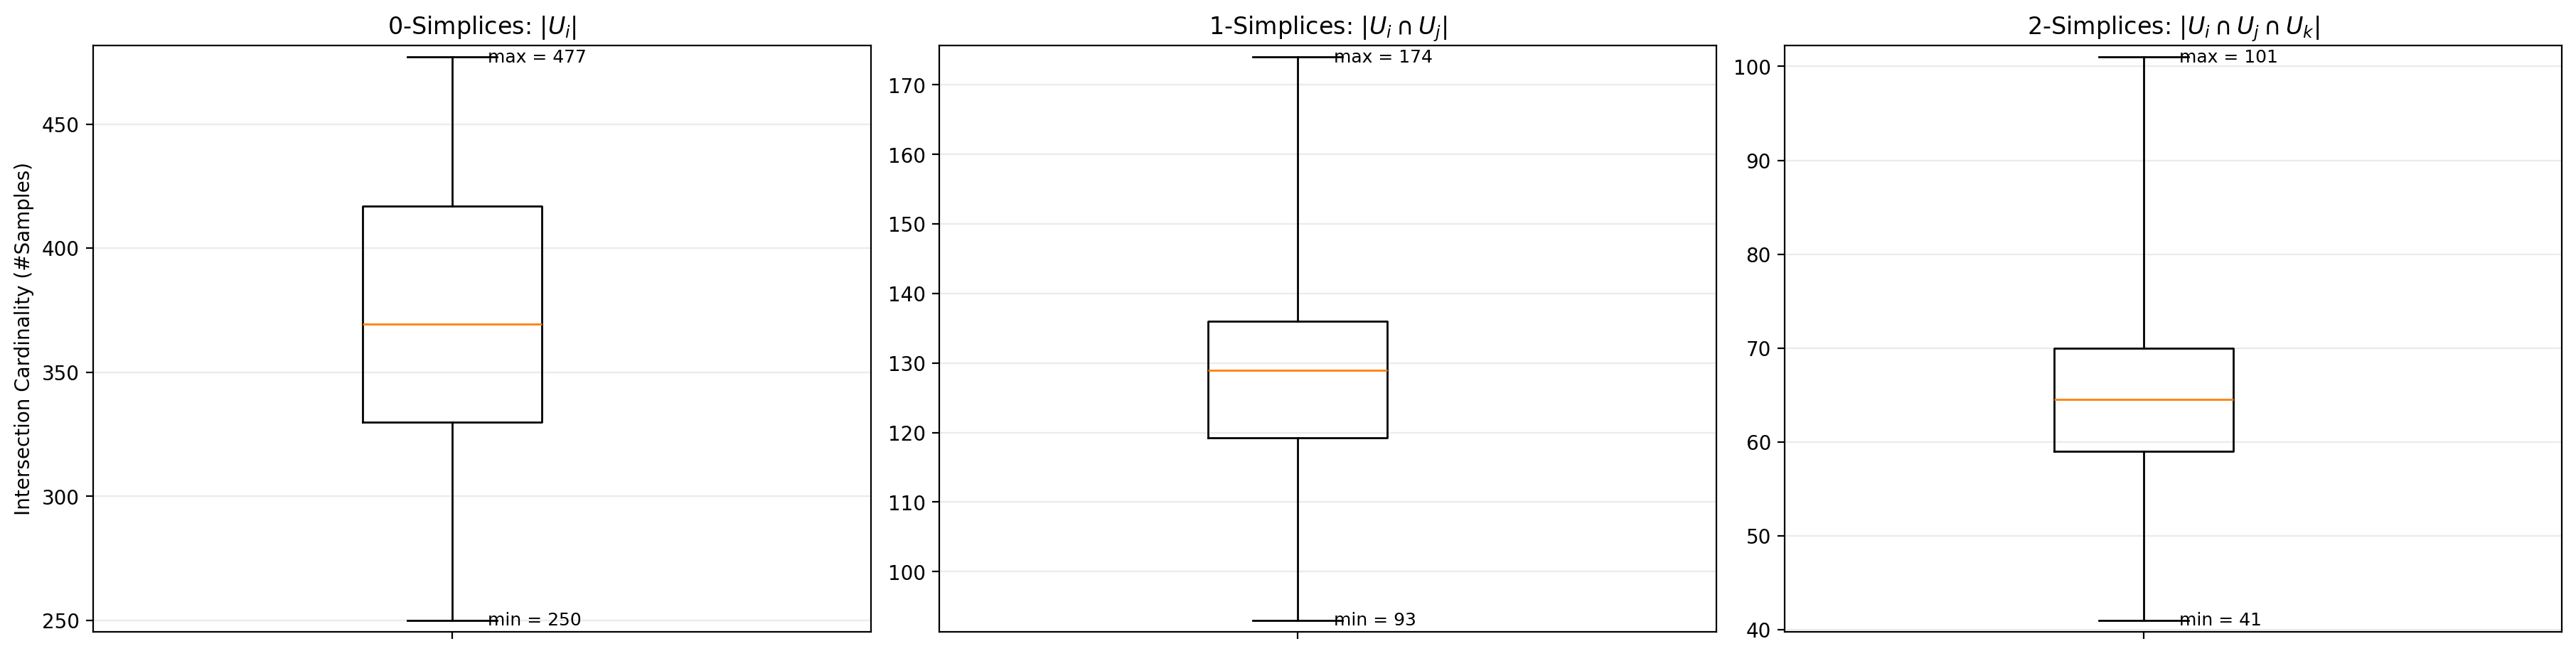

In [4]:
# --- Construct an open cover of S2 ---

n_landmarks = 80
s2_cover = cb.make_s2_fibonacci_star_cover(base_points, n_vertices = n_landmarks)
s2_summ = s2_cover.summarize(plot = True)

$\textbf{Main bundle computation}$: Compute local trivializations and characteristic classes using a quotient metric on $\mathbb{S}^{3}$.

In [5]:
p = 4  #CHOOSE: a p-value for the quotient metric


total_metric = s3_quotient_metric(p=p, v_axis = v, antipodal = False)    

lens_bundle = cb.build_bundle(
    s3_data,
    s2_cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse circular coordinates
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 'bundle_app',
 'bundle_map',
 'classes',
 'cocycle',
 'compare_trivs',
 'compute_bundle_map',
 'compute_global_trivialization',
 'compute_max_trivial_subcomplex',
 'compute_persistence',
 'cover',
 'data',
 'get_bundle_map',
 'get_frame_dataset',
 'get_global_trivialization',
 'get_max_trivial_subcomplex',
 'get_persistence',
 'get_pullback_data',
 'global_trivialization',
 'local_triv',
 'max_trivial',
 'meta',
 'persistence',
 'quality',
 'show_bundle',
 'show_circle_nerve',
 'show_max_trivial',
 'show_nerve',
 'total_met

# Quotients $(\mathbb{S}^{2}\times\mathbb{S}^{1})/\mathbb{Z}_{2}$ As Circle Bundles Over $\mathbb{RP}^{2}$ 

Consider the trivial circle bundle over $\mathbb{S}^{2}$ defined by the projection of the product $\mathbb{S}^{2}\times\mathbb{S}^{1}$ onto the first factor.  We identify each base point in $\mathbb{S}^{2}$ with its antipodal and define three quotient metrics on $\mathbb{S}^{2}\times\mathbb{S}^{1}$ corresponding to three different $\mathbb{Z}_{2}$-actions covering the antipodal map on $\mathbb{S}^{2}$:

$\textbf{1.}$ $(v,z)\cdot (-1) := (-v,z)$

$\textbf{2.}$ $(v,z)\cdot (-1) := (-v,-z)$

$\textbf{3.}$ $(v,z)\cdot (-1) := (-v,\bar{z})$

In each case, we obtain an induced circle bundle over $\mathbb{RP}^{2}$.  The quotient induced by $\textbf{1}$ above yields the trivial bundle; $\textbf{2}$ yields the (unique) non-trivial orientable circle bundle over $\mathbb{RP}^{2}$, and $\textbf{3}$ yields the non-orientable circle bundle over $\mathbb{RP}^{2}$ with (twisted) Euler number 0.   

In [ ]:
# --- Generate a sample from the trivial bundle over s2 ---

n_samples = 10000
sigma = 0.05
data, base_points, angles = cb.sample_s2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)
print(f'Generated {n_samples} samples from the product circle bundle over S2.')

In [ ]:
# --- Construct an open cover of rp2 ---

n_landmarks = 80
rp2_cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
rp2_summ = rp2_cover.summarize(plot = True)

In [ ]:
# --- Compute local trivializations and characteristic classes ---

total_metrics = [rp2_trivial_metric(), rp2_nontrivial_orientable_metric(), rp2_nonorientable_metric()]  


j = 2   #CHOOSE: a metric on the total space
total_metric = total_metrics[j]


bundle = cb.build_bundle(
    data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's
    total_metric = total_metric,
    show=True,
)


Below we compute the persistence of each characteristic class representative with respect to the weights filtration of the nerve of the open cover of $\mathbb{RP}^{2}$ (see [1] for details).  We expect the orientable cocycles to become coboundaries after a single edge is removed from the nerve, but non-orientable cocycles over $\mathbb{RP}^{2}$ may have much longer 'lifetimes.'

In [ ]:
# --- Compute class persistence on the weights filtration of the nerve ---
pers = bundle.get_persistence(show = True)


# Quotients $\mathbb{S}^{3}/(\mathbb{Z}_{2p}\rtimes\mathbb{Z}_{2})$ As Circle Bundles Over $\mathbb{RP}^{2}$

We combine the ideas from the two experiments above to construct the non-orientable bundles over $\mathbb{RP}^{2}$ which also have non-trivial twisted Euler class. One can show that such bundles are classified up to isomorphism by the absolute values of their twisted Euler numbers. In particular, for any even integer $2p\in \mathbb{Z}$, we define a $\mathbb{Z}_{2p}$-action and a $\mathbb{Z}_{2}$-action on $\mathbb{S}^{3}\subset\mathbb{C}^{2}$ by $(w,z)\cdot m := (w,z)\cdot  e^{2\pi i\left(\frac{m}{2p}\right)}$ and $(w,z)\cdot (-1) = (-w,\bar{z})$. The resulting quotient space has the structure of a non-orientable circle bundle over $\mathbb{RP}^{2}$ with twisted Euler number $\pm p$.  

In [ ]:
# --- Generate a sample of s3 ---

n_samples = 10000
s3_data = cb.sample_sphere(n = n_samples, dim = 3)

v = np.array([1.0, 0.0, 0.0]) 
base_points = cb.hopf_projection(s3_data, v= v)

print(f'Generated {n_samples} samples from S3.')

In [ ]:
# --- Construct an open cover of rp2 ---

n_landmarks = 80
rp2_cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
rp2_summ = rp2_cover.summarize(plot = True)

In [ ]:
# --- Compute local trivializations and characteristic classes using a quotient metric on s3 ---

p = 3  #CHOOSE: a p-value for the quotient metric


total_metric = s3_quotient_metric(p = 2*p, v_axis = v, antipodal = True)

bundle = cb.build_bundle(
    s3_data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's 
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


Construct a point cloud representation of the metric data using a classifying map to a Grassmann manifold (see [1] for details)

In [ ]:
# --- Construct a classifying map to the Grassmann manifold and compute the pullback bundle ---

pullback_results = bundle.get_pullback_data(
    subcomplex = 'full',
    base_weight=1.0,
    fiber_weight=1.0,
    packing = 'coloring2',
    show_summary = True
)


Verify that the point cloud and associated projection map have the same circle bundle classification as the original dataset

In [ ]:
# --- Construct a pullback coordinate bundle object ---

pb_bundle = cb.build_bundle(
    pullback_results.total_data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)
